In [1]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import csv
from time import sleep
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re 

In [2]:
def news_headlines(urls):
    news_summaries = []
    for url in urls:
        sleep(20)  
        r = requests.get(url)
        print(r.status_code)  # Print the status code
        content = r.text
        soup = BeautifulSoup(content, "html.parser")
        st_divs = soup.findAll('h3', {"class": "r"})
        for st_div in st_divs:
            news_summaries.append(st_div.text)
    return news_summaries
    

In [3]:
# from selenium import webdriver

# driver = webdriver.Chrome('C:\Users\KB\Downloads\chromedriver_win32\chromedriver.exe')
# driver.implicitly_wait(3)
# news_summaries = []
# sleep(20)  
# driver.get(urls[1])
# print(driver.get.status_code)  # Print the status code
# url1 = driver.page_source
# soup = BeautifulSoup(url1)
# st_divs = soup.find_all('h3', {"class": "st"})
# for st_div in st_divs:
#     news_summaries.append(st_div.text)


In [4]:
urls = ["https://www.google.com/search?tbm=nws&q=%22iot%22",
        "https://www.google.com/search?tbm=nws&q=%22iot%20future%22"]

In [5]:
headlines=news_headlines(urls)
thefile = open('headlines13.txt', 'w')
for item in headlines:
    thefile.write("%s\n" % item.encode('utf-8'))

thefile.close()

200
200


(-0.5, 999.5, 499.5, -0.5)

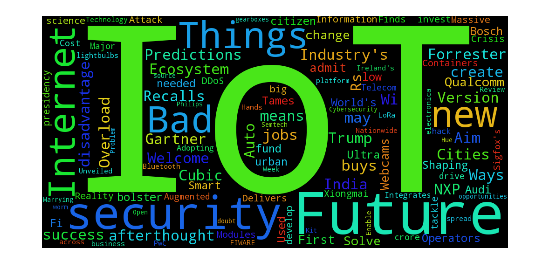

In [6]:
with open("headlines_this_week.txt") as f:
    lines=f.readlines()
    text= "".join(lines)
    
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline


wordcloud = WordCloud(width = 1000, height = 500).generate(text)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")


In [7]:
filenames=['C:\Users\KB\Documents\Python_exo\Hmw_python\headlines_after_10_21.txt',
           'C:\Users\KB\Documents\Python_exo\Hmw_python\headlines_last_week.txt',
           'C:\Users\KB\Documents\Python_exo\Hmw_python\headlines_this_week.txt']

vectorizer = CountVectorizer(input='filename',stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()
type(vocab)
dtm = dtm.toarray()  # convert to a regular array
vocab = np.array(vocab)

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)
dist[0, 2]
dist

array([[  0.        ,  33.18132005,  87.42997198],
       [ 33.18132005,   0.        ,  86.81589716],
       [ 87.42997198,  86.81589716,   0.        ]])

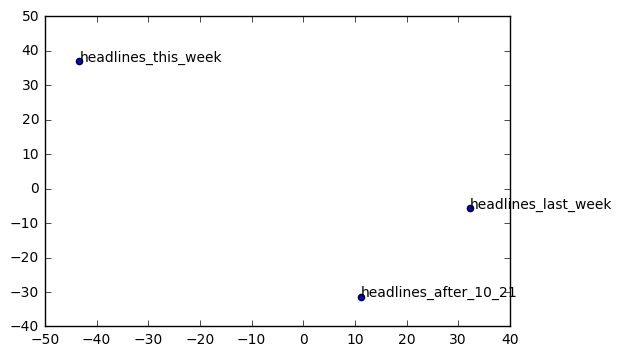

In [9]:
from sklearn.manifold import MDS
import os

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:convert
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

# color-blind-friendly palette
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()

In [10]:
from collections import Counter

with open("headlines_after_10_21.txt") as f:
    lines=f.readlines()
    text1= "".join(lines)
f.close()
with open("headlines_last_week.txt") as f:
    lines=f.readlines()
    text2= "".join(lines)
f.close()
with open("headlines_this_week.txt") as f:
    lines=f.readlines()
    text3= "".join(lines)
    
f.close()


C:\Users\KB\Anaconda2\lib\site-packages\pattern\text\__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):
C:\Users\KB\Anaconda2\lib\site-packages\pattern\text\__init__.py:1943: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in imap(lambda e: e.lower(), e):


((0.06969101514282239, 0.4465645917001339), (0.04700698122485833, 0.43971367707401227), (0.07321892393320965, 0.3733147804576376))


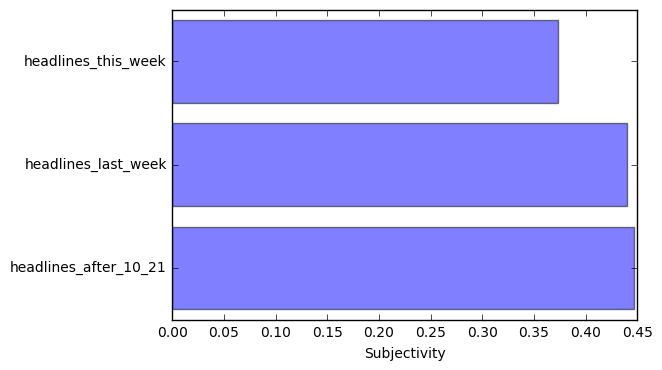

In [11]:
from pattern.en import sentiment
print(sentiment(text1),sentiment(text2),sentiment(text3))
Polarity=[sentiment(text1)[0],sentiment(text2)[0],sentiment(text3)[0]]
Subjectivity=[sentiment(text1)[1],sentiment(text2)[1],sentiment(text3)[1]]
data=['headlines_after_10_21','headlines_last_week','headlines_this_week']
pd.Series(Subjectivity,index=data)

objects = ('headlines_after_10_21','headlines_last_week','headlines_this_week')
y_pos = np.arange(len(objects))
sub = Subjectivity

Polarity=[sentiment(text1)[0],sentiment(text2)[0],sentiment(text3)[0]]

plt.barh(y_pos, sub, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Subjectivity')
 
plt.show()

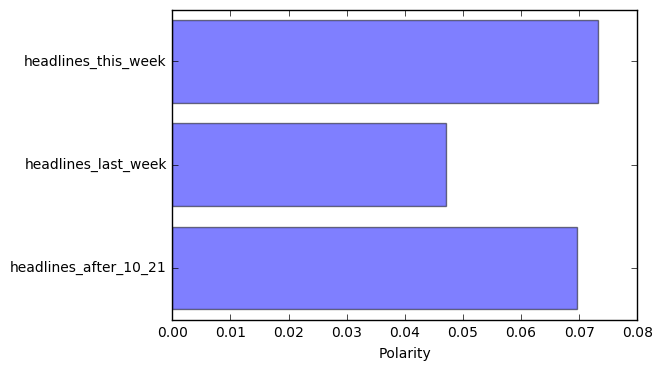

In [53]:
objects = ('headlines_after_10_21','headlines_last_week','headlines_this_week')
y_pos = np.arange(len(objects))

Polarity=[sentiment(text1)[0],sentiment(text2)[0],sentiment(text3)[0]]

plt.barh(y_pos, Polarity, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Polarity')
 
plt.show()

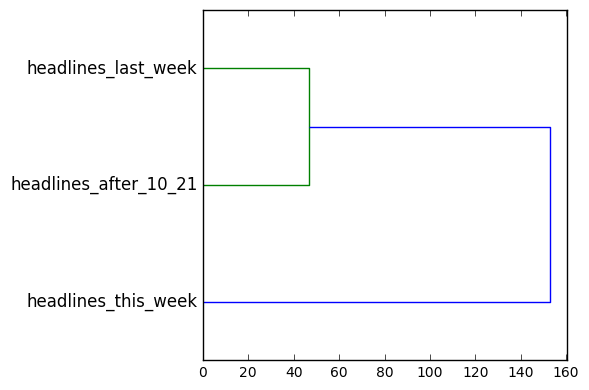

In [12]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

dendrogram(linkage_matrix, orientation="right", labels=names)
plt.tight_layout()
plt.show()

In [13]:
filenames
rates =dtm / np.sum(dtm, axis=1, keepdims=True)
word_idx = list(vocab).index('iot')
dtm[0, word_idx]
dtm.shape

(3L, 787L)

In [39]:
import sklearn.feature_extraction.text as text

vectorizer = text.CountVectorizer(input='filename', stop_words='english')
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())
print dtm.shape, len(vocab)

sec_idx = list(vocab).index('security')
security=[dtm[0, sec_idx],dtm[1, sec_idx],dtm[2, sec_idx]]
sec_idx = list(vocab).index('ddos')
ddos=[dtm[0, sec_idx],dtm[1, sec_idx],dtm[2, sec_idx]]
sec_idx = list(vocab).index('attack')
attack=[dtm[0, sec_idx],dtm[1, sec_idx],dtm[2, sec_idx]]
sec_idx = list(vocab).index('future')
future=[dtm[0, sec_idx],dtm[1, sec_idx],dtm[2, sec_idx]]
sec_idx = list(vocab).index('bad')
bad=[dtm[0, sec_idx],dtm[1, sec_idx],dtm[2, sec_idx]]


y=[security,ddos,attack,future,bad]
y[1][2]
y

(3L, 787L) 787


[[20, 21, 5], [6, 5, 2], [4, 5, 2], [11, 11, 10], [0, 0, 3]]

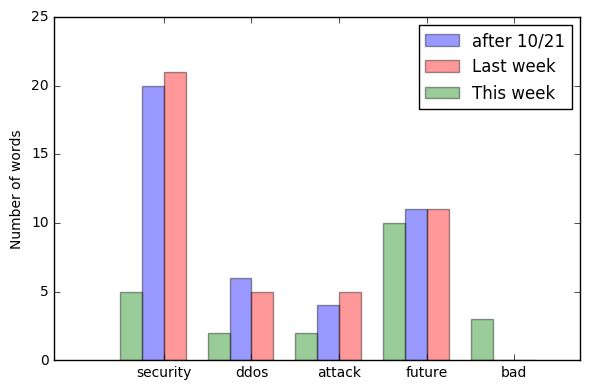

In [48]:
n_groups = 5

y=[security,ddos,attack,future,bad]

nw=['headlines_after_10_21','headlines_last_week','headlines_this_week']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, [y[0][0],y[1][0],y[2][0],y[3][0],y[4][0]], bar_width,
                 alpha=opacity,
                 color='b',
                 label='after 10/21')

rects2 = plt.bar(index + bar_width,[y[0][1],y[1][1],y[2][1],y[3][1],y[4][1]], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Last week')

rects2 = plt.bar(index - bar_width, [y[0][2],y[1][2],y[2][2],y[3][2],y[4][2]], bar_width,
                 alpha=opacity,
                 color='g',
                 label='This week')


plt.ylabel('Number of words')
plt.xticks(index + bar_width, ("security","ddos","attack","future","bad"))
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
from sklearn import decomposition

num_topics = 2

clf = decomposition.NMF(n_components=num_topics)
clf

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=2, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [50]:
doctopic = clf.fit_transform(dtm)
doctopic 

array([[ 8.25187886,  2.95428388],
       [ 9.06577627,  0.        ],
       [ 0.        ,  8.08667691]])

In [51]:
# print words associated with topics
topic_words = []
num_top_words = 20
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])
topic_words

[[u'iot',
  u'internet',
  u'things',
  u'security',
  u'market',
  u'devices',
  u'users',
  u'new',
  u'future',
  u'attacks',
  u'world',
  u'announced',
  u'2017',
  u'cloud',
  u'ddos',
  u'years',
  u'technologies',
  u'look',
  u'semiconductor',
  u'need'],
 [u'iot',
  u'future',
  u'security',
  u'internet',
  u'things',
  u'cities',
  u'new',
  u'bad',
  u'afterthought',
  u'smart',
  u'urban',
  u'reality',
  u'augmented',
  u'ddos',
  u'predictions',
  u'forrester',
  u'qualcomm',
  u'information',
  u'world',
  u'2017']]

In [333]:
# type(topic_words)
# word_file = open('topic_words.txt', 'w')
# for item in topic_words:
#     word_file.write("%s\n" % item)

# word_file.close()

In [335]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)
doctopic

array([[ 0.73636971,  0.26363029],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ]])

In [338]:
news_weeks =['headlines_after_10_21','headlines_last_week','headlines_this_week']

# turn this into an array so we can use NumPy functions
news_weeks = np.asarray(news_weeks)

doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(news_weeks))

doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(news_weeks))):
    doctopic_grouped[i, :] = np.mean(doctopic[news_weeks == name, :], axis=0)

doctopic = doctopic_grouped
doctopic

array([[ 0.73636971,  0.26363029],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ]])

In [341]:
nw = sorted(set(news_weeks))

print("Top NMF topics in...")

for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(nw[i], top_topics_str))

Top NMF topics in...
headlines_after_10_21: 0 1
headlines_last_week: 0 1
headlines_this_week: 1 0


In [342]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: iot internet things security market devices users new future attacks world announced 2017 cloud ddos
Topic 1: iot future security internet things cities new bad afterthought smart urban reality augmented ddos predictions


1 1 0
